# Note this model excluded regio1, postalcodes, firingtypes and conditions

they didn't have much influence, since we have cities
interesting about heating type though

In [2]:
import pandas as pd
import seaborn as sns
#the file is a number of data from ImmoScout (webscrapped for all Germany)
file_path = 'https://raw.githubusercontent.com/okravtsova123/ironhack_study/main/MidTermProject/rent.csv'

# reading file with different encodings
try:
    df = pd.read_csv(file_path, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='latin-1',  sep=';')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='ISO-8859-1',  sep=';')


# Cleanng and preparing data

In [3]:
#checking the df
#print(df[['livingspace', 'livingspacerange']].groupby(df['livingspacerange']).min('livingspace'))
#print(df[['livingspace', 'livingspacerange']].groupby(df['livingspacerange']).max('livingspace'))

In [4]:
# Performing additional formatting for column names (lowercase, strip and replace spaces with underscores) - esier to work further
df.columns = [name.strip().replace(" ", "_").lower() for name in df.columns]

In [5]:
df.columns

Index(['regio1', 'servicecharge', 'heatingtype', 'telekomtvoffer',
       'telekomhybriduploadspeed', 'newlyconst', 'balcony', 'picturecount',
       'pricetrend', 'telekomuploadspeed', 'totalrent', 'yearconstructed',
       'scoutid', 'noparkspaces', 'firingtypes', 'haskitchen', 'geo_bln',
       'cellar', 'yearconstructedrange', 'baserent', 'housenumber',
       'livingspace', 'geo_krs', 'condition', 'interiorqual', 'petsallowed',
       'street', 'streetplain', 'lift', 'baserentrange', 'typeofflat',
       'geo_plz', 'norooms', 'thermalchar', 'floor', 'numberoffloors',
       'noroomsrange', 'garden', 'livingspacerange', 'energyefficiencyclass'],
      dtype='object')

In [6]:
#function to check null values
def null_check(df):
    print(f'Total null values per row: \n{df.isnull().sum(axis=1)}\n')
    print(f'Total null values per column: \n{df.isnull().sum()}\n')

In [7]:
#applying
null_check(df)

Total null values per row: 
0         3
1         8
2         4
3         8
4         8
         ..
268845    7
268846    7
268847    3
268848    4
268849    9
Length: 268850, dtype: int64

Total null values per column: 
regio1                           0
servicecharge                 6909
heatingtype                  44856
telekomtvoffer               32619
telekomhybriduploadspeed    223830
newlyconst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomuploadspeed           33358
totalrent                    40517
yearconstructed              57045
scoutid                          0
noparkspaces                175798
firingtypes                  56964
haskitchen                       0
geo_bln                          0
cellar                           0
yearconstructedrange         57045
baserent                         0
housenumber                  71018
livingspace                      0
geo_krs  

In [8]:
#function to find duplicates
def dup_check(df):
    print(f'Duplicates found: {df.duplicated().any()}\n')
    print(f'Number of duplicates: {df.duplicated().sum()}\n')

In [9]:
dup_check(df)

Duplicates found: False

Number of duplicates: 0



In [10]:
#Choosing only new buildings as rent is not controlled by government
df = df[(df['newlyconst']== True)]

In [11]:
df["geo_krs"].nunique()

402

In [12]:
#choosing the facors for the model
df = df.loc[:, ['baserent', 'heatingtype', 'balcony', 'noparkspaces', 'haskitchen',
       'cellar','livingspacerange', 'petsallowed', 'geo_krs', 'lift', 'norooms', 'floor', 'garden', 'energyefficiencyclass', 'geo_krs']]


In [13]:
df

,baserent,heatingtype,balcony,noparkspaces,haskitchen,cellar,livingspacerange,petsallowed,geo_krs,lift,norooms,floor,garden,energyefficiencyclass,geo_krs
2,965.00,floor_heating,True,1.0,False,True,4,NaN,Dresden,True,3.0,3.0,False,NaN,Dresden
14,972.60,gas_heating,True,1.0,False,True,4,negotiable,Dortmund,True,3.0,0.0,False,NaN,Dortmund
29,520.08,district_heating,True,1.0,False,True,2,NaN,Schwerin,True,2.0,NaN,False,NaN,Schwerin
48,870.00,NaN,True,NaN,True,False,4,NaN,Steinburg_Kreis,False,3.0,2.0,False,B,Steinburg_Kreis
69,900.00,floor_heating,True,1.0,False,True,3,NaN,Dresden,True,3.0,0.0,False,B,Dresden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268806,2200.00,district_heating,True,1.0,True,True,7,negotiable,Mannheim,True,4.0,1.0,True,NaN,Mannheim
268809,371.43,heat_pump,True,1.0,False,True,2,no,Rheinisch_Bergischer_Kreis,True,2.0,NaN,False,NaN,Rheinisch_Bergischer_Kreis
268821,680.00,central_heating,True,1.0,False,True,3,no,Rhein_Hunsr?ck_Kreis,False,2.0,1.0,False,NaN,Rhein_Hunsr?ck_Kreis
268827,990.00,central_heating,True,1.0,True,False,4,no,Hannover_Kreis,True,2.5,1.0,False,NaN,Hannover_Kreis


In [14]:
df = df.reset_index()

In [15]:
df

,index,baserent,heatingtype,balcony,noparkspaces,haskitchen,cellar,livingspacerange,petsallowed,geo_krs,lift,norooms,floor,garden,energyefficiencyclass,geo_krs
0,2,965.00,floor_heating,True,1.0,False,True,4,NaN,Dresden,True,3.0,3.0,False,NaN,Dresden
1,14,972.60,gas_heating,True,1.0,False,True,4,negotiable,Dortmund,True,3.0,0.0,False,NaN,Dortmund
2,29,520.08,district_heating,True,1.0,False,True,2,NaN,Schwerin,True,2.0,NaN,False,NaN,Schwerin
3,48,870.00,NaN,True,NaN,True,False,4,NaN,Steinburg_Kreis,False,3.0,2.0,False,B,Steinburg_Kreis
4,69,900.00,floor_heating,True,1.0,False,True,3,NaN,Dresden,True,3.0,0.0,False,B,Dresden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21166,268806,2200.00,district_heating,True,1.0,True,True,7,negotiable,Mannheim,True,4.0,1.0,True,NaN,Mannheim
21167,268809,371.43,heat_pump,True,1.0,False,True,2,no,Rheinisch_Bergischer_Kreis,True,2.0,NaN,False,NaN,Rheinisch_Bergischer_Kreis
21168,268821,680.00,central_heating,True,1.0,False,True,3,no,Rhein_Hunsr?ck_Kreis,False,2.0,1.0,False,NaN,Rhein_Hunsr?ck_Kreis
21169,268827,990.00,central_heating,True,1.0,True,False,4,no,Hannover_Kreis,True,2.5,1.0,False,NaN,Hannover_Kreis


In [16]:
null_check(df)

Total null values per row: 
0        2
1        1
2        3
3        3
4        1
        ..
21166    1
21167    2
21168    1
21169    1
21170    1
Length: 21171, dtype: int64

Total null values per column: 
index                        0
baserent                     0
heatingtype               3045
balcony                      0
noparkspaces              6611
haskitchen                   0
cellar                       0
livingspacerange             0
petsallowed               9357
geo_krs                      0
lift                         0
norooms                      0
floor                     5238
garden                       0
energyefficiencyclass    11456
geo_krs                      0
dtype: int64



In [17]:
df = df.dropna()

In [18]:
#checking unqiue values in hitting
df['heatingtype'].unique()

array(['floor_heating', 'central_heating', 'district_heating',
       'heat_pump', 'combined_heat_and_power_plant', 'gas_heating',
       'wood_pellet_heating', 'self_contained_central_heating',
       'solar_heating', 'stove_heating', 'oil_heating',
       'electric_heating'], dtype=object)

In [19]:
#checking unqiue values in coditions
#df['condition'].unique()

In [20]:
#checking unqiue values in coditions
#df['firingtypes'].nunique()

In [21]:
#unifying first time use and all refurbishement, modernization and renovation in 1 thing

#def condition_clean(state):
#        if 'first_time_use' in state:
#           state='first_time_use'
#        elif state=='fully_renovated' or state=='refurbished' or state=='modernized':
#           state='refurbished'
#       else:
#           state=state
#       return state
    
#unifying types of firing

def firingtypes_clean(ftype):
    if 'gas' in ftype:
        ftype='gas'
    elif 'electricity' in ftype:
        ftype='electricity'
    elif 'solar_heating' in ftype or 'wind_energy' in ftype or'hydro_energy' in ftype or 'bio_energy' in ftype or 'geothermal' in ftype or 'thermal_energy' in ftype or 'renewable_energy' in ftype or 'regenerative_energy' in ftype:
        ftype='renewable_energy_heating'
    elif "pellet_heating" in ftype or 'fossil_fuels' in ftype or 'wood_chips' in ftype:
        ftype='pellet_heating'
    elif 'district_heating' in ftype:
        ftype='district_heating'
    else:
        ftype=ftype
    return ftype

In [22]:
#applying defined function for cleaning    
#df['condition']=df['condition'].apply(condition_clean)
#df['firingtypes']=df['firingtypes'].apply(firingtypes_clean)

In [23]:
#checking energyefficiencyclass
print(df["energyefficiencyclass"].groupby(df["energyefficiencyclass"]).count())

#droping rows with NO_INFORMATION
df=df[df["energyefficiencyclass"]!='NO_INFORMATION'].reset_index()

energyefficiencyclass
A                 908
A_PLUS            861
B                 929
C                 161
D                  37
E                   3
F                   2
NO_INFORMATION    485
Name: energyefficiencyclass, dtype: int64


In [24]:
#cleaning two useless columns. And heatng type is removed as it's a copy of firing type
columns_needed=['baserent', 'balcony', 'noparkspaces', 'haskitchen',
       'cellar','livingspacerange', 'petsallowed', 'geo_krs', 'lift', 'norooms', 'floor', 'garden', 'energyefficiencyclass']
df=df.loc[: , columns_needed]

In [25]:
#cheking spelling mistakes in regio1
#df['regio1'].groupby(df['regio1']).count()

In [26]:
#clening misspellings

def regio1_clean(region):
    if region=='Baden_W?rttemberg':
        region='Baden-Württemberg'
    elif region=='Th?ringen':
        region='Thüringia'
    else:
        region=region
    return region

In [27]:
#applying
#df['regio1']=df['regio1'].apply(regio1_clean)

In [29]:
#cheking spelling mistakes in geo_krs
#REMOVE cities with less than 10 appartments, because they give too much influence in model
#cities = df.groupby('geo_krs').size().reset_index(name='count')
#cities_to_drop = cities[cities['geo_krs']<10]
#df = df[~df['geo_krs'].isin(cities_to_drop['geo_krs'])].reset_index(drop=True)
#df['geo_krs'].groupby(df['geo_krs']).count()
#df['geo_krs'].unique()

In [30]:
#checking pets
df['petsallowed'].groupby(df['petsallowed']).count()

petsallowed
negotiable    1540
no            1135
yes            226
Name: petsallowed, dtype: int64

In [31]:
#checking outliers - identifying IQR

df['baserent'].describe()
IQR=df['baserent'].quantile(0.75)-df['baserent'].quantile(0.25)
base_min=df['baserent'].quantile(0.25)-1.5*IQR
base_max=df['baserent'].quantile(0.75)+3*IQR
print(base_min, base_max)

#countring how many flats are outliers
x_low=0
x_high=0
for price in df['baserent']:
    if price<base_min:
        x_low+=1
    elif price>base_max:
        x_high+=1

print(f'outliers too low:{x_low}\noutliers too high: {x_high}')

5.0 2920.0
outliers too low:0
outliers too high: 28


In [32]:
#dropping rows with outliers
df=df.loc[df['baserent']<base_max]

In [33]:
df.isna().sum()

baserent                 0
balcony                  0
noparkspaces             0
haskitchen               0
cellar                   0
livingspacerange         0
petsallowed              0
geo_krs                  0
geo_krs                  0
lift                     0
norooms                  0
floor                    0
garden                   0
energyefficiencyclass    0
dtype: int64

# ENCODING FACTORS FOR MODEL CREATION

In [34]:
#splitting df into numericals and categoricals
categoricals = df.select_dtypes(include=[object, bool]).drop('geo_krs', axis=1)
numericals = df.select_dtypes(include = 'number')

In [35]:
categoricals

,balcony,haskitchen,cellar,petsallowed,lift,garden,energyefficiencyclass
0,True,False,True,negotiable,True,False,A_PLUS
1,True,True,True,no,True,False,A
2,True,False,True,negotiable,False,False,B
3,True,True,True,yes,True,False,C
4,True,False,True,negotiable,True,False,B
...,...,...,...,...,...,...,...
2896,True,False,True,no,True,False,B
2897,True,True,False,yes,True,False,C
2898,True,True,True,no,False,False,A_PLUS
2899,True,True,True,yes,True,False,B


In [36]:
numericals

,baserent,noparkspaces,livingspacerange,norooms,floor
0,845.00,1.0,2,2.0,1.0
1,1680.00,1.0,4,1.5,2.0
2,950.00,1.0,3,2.0,1.0
3,1337.22,1.0,5,3.0,1.0
4,1321.61,1.0,5,4.0,4.0
...,...,...,...,...,...
2896,1159.36,2.0,6,4.0,1.0
2897,1533.92,1.0,6,5.0,2.0
2898,1450.00,1.0,6,5.5,1.0
2899,1383.33,1.0,5,5.0,5.0


In [37]:
ordinals = categoricals[["energyefficiencyclass", "balcony","haskitchen", "cellar", "lift", "garden", "petsallowed"]].reset_index()
nominals = categoricals.drop(columns=["energyefficiencyclass", "balcony","haskitchen", "cellar", "lift", "garden","petsallowed"]).reset_index()

In [38]:
nominals=nominals.drop('index', axis=1)
nominals

""
0
1
2
3
4
...
2868
2869
2870
2871


In [39]:
#checking how we will encode the ordinals
ordinals["energyefficiencyclass"].groupby(df["energyefficiencyclass"]).count()

energyefficiencyclass
A         886
A_PLUS    848
B         911
C         158
D          37
E           3
F           2
Name: energyefficiencyclass, dtype: int64

In [40]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
#encoding energy efficiency class for model creation

enc = OrdinalEncoder(categories=[["F", "E", "D", "C", "B","A", "A_PLUS"]])

ordinals["energyefficiencyclass"] = enc.fit_transform(ordinals[["energyefficiencyclass"]])

In [42]:
#encoding haskitchen for model creation

ordinals["haskitchen"] = ordinals["haskitchen"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["haskitchen"] = enc.fit_transform(ordinals[["haskitchen"]])

In [43]:
#encoding balcony for model creation

ordinals["balcony"] = ordinals["balcony"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["balcony"] = enc.fit_transform(ordinals[["balcony"]])

In [44]:
#encoding cellar for model creation

ordinals["cellar"] = ordinals["cellar"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["cellar"] = enc.fit_transform(ordinals[["cellar"]])

In [45]:
#encoding lift for model creation

ordinals["lift"] = ordinals["lift"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["lift"] = enc.fit_transform(ordinals[["lift"]])

In [46]:
#encoding garden for model creation

ordinals["garden"] = ordinals["garden"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["garden"] = enc.fit_transform(ordinals[["garden"]])

In [47]:
#encoding petsallowed for model creation

enc = OrdinalEncoder(categories=[['no', 'negotiable', 'yes']])
ordinals["petsallowed"] = enc.fit_transform(ordinals[["petsallowed"]])

In [48]:
ordinals.isna().sum()

index                    0
energyefficiencyclass    0
balcony                  0
haskitchen               0
cellar                   0
lift                     0
garden                   0
petsallowed              0
dtype: int64

In [49]:
#making dunnies from nominals
#nominals = pd.get_dummies(nominals, dtype=int)

In [50]:
nominals.isna().sum()

Series([], dtype: float64)

In [51]:
#concating ordinals and nominals
categorical = pd.concat([ordinals,nominals], axis=1).reset_index()

In [52]:
categorical.isna().sum()

level_0                  0
index                    0
energyefficiencyclass    0
balcony                  0
haskitchen               0
cellar                   0
lift                     0
garden                   0
petsallowed              0
dtype: int64

In [53]:
categorical=categorical.drop(['level_0', 'index'], axis=1)

In [54]:
categorical=categorical.reset_index()

In [55]:
numericals=numericals.reset_index()

In [56]:
numericals.dtypes

index                 int64
baserent            float64
noparkspaces        float64
livingspacerange      int64
norooms             float64
floor               float64
dtype: object

In [57]:
#concating categoricals and numericals
final_df = pd.concat([numericals,categorical], axis=1).drop('index', axis=1)

In [58]:
final_df

,baserent,noparkspaces,livingspacerange,norooms,floor,energyefficiencyclass,balcony,haskitchen,cellar,lift,garden,petsallowed
0,845.00,1.0,2,2.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,1.0
1,1680.00,1.0,4,1.5,2.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0
2,950.00,1.0,3,2.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1337.22,1.0,5,3.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0
4,1321.61,1.0,5,4.0,4.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2868,1159.36,2.0,6,4.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0
2869,1533.92,1.0,6,5.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,2.0
2870,1450.00,1.0,6,5.5,1.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0
2871,1383.33,1.0,5,5.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0,2.0


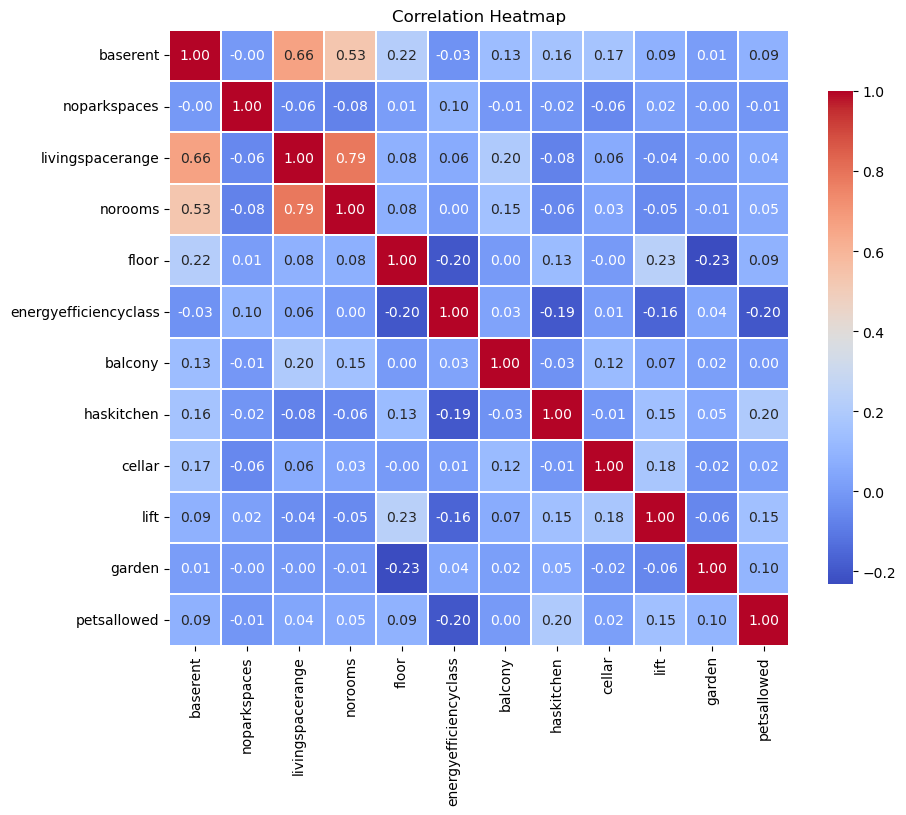

In [61]:
import matplotlib.pyplot as plt
corr_matrix = final_df.corr()
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')  # Optional: Add a title to your heatmap
plt.show()

# Model creation
## X-y split (y is the target variable, in this case, "base rent")

In [62]:
#X-y split
X=final_df.drop('baserent', axis=1)
y=final_df[['baserent']]

In [63]:
X

,noparkspaces,livingspacerange,norooms,floor,energyefficiencyclass,balcony,haskitchen,cellar,lift,garden,petsallowed
0,1.0,2,2.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,1.0
1,1.0,4,1.5,2.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,3,2.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,5,3.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0
4,1.0,5,4.0,4.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2868,2.0,6,4.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0
2869,1.0,6,5.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,2.0
2870,1.0,6,5.5,1.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0
2871,1.0,5,5.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0,2.0


In [64]:
y

,baserent
0,845.00
1,1680.00
2,950.00
3,1337.22
4,1321.61
...,...
2868,1159.36
2869,1533.92
2870,1450.00
2871,1383.33


## train_test_split

In [65]:
#train_test split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [68]:
X_train

,noparkspaces,livingspacerange,norooms,floor,energyefficiencyclass,balcony,haskitchen,cellar,lift,garden,petsallowed
2676,1.0,3,3.0,2.0,6.0,1.0,0.0,0.0,1.0,0.0,1.0
2216,2.0,4,2.0,2.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0
2453,1.0,4,3.0,3.0,5.0,1.0,0.0,1.0,1.0,0.0,1.0
1344,2.0,4,4.0,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0
438,1.0,2,2.0,4.0,5.0,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1638,1.0,4,3.0,4.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0
1095,1.0,4,2.0,-1.0,5.0,0.0,1.0,1.0,0.0,1.0,0.0
1130,1.0,2,2.0,2.0,4.0,1.0,1.0,1.0,1.0,0.0,2.0
1294,1.0,4,3.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0


In [69]:
#X_train.hist()

array([[<Axes: title={'center': 'baserent'}>]], dtype=object)

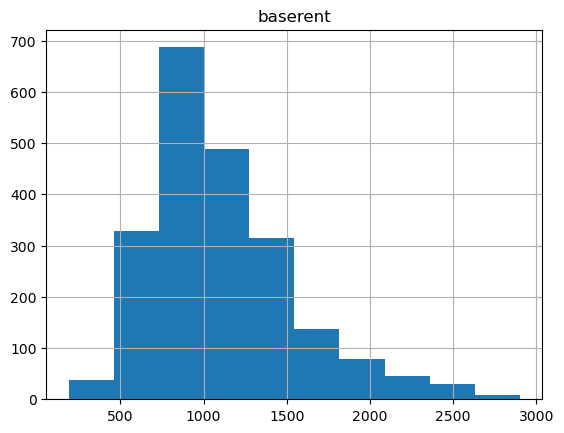

In [70]:
y_train.hist()

## using powertransform for X and Y


In [71]:
from sklearn.preprocessing import PowerTransformer

In [72]:
#fitting power transformer to use in train and test sets

pt=PowerTransformer()
pt.fit(X_train)

PowerTransformer()

In [73]:
#transforming train and test sets

X_train=pt.transform(X_train)
X_test=pt.transform(X_test)

In [74]:
#transforming y
from sklearn.preprocessing import StandardScaler
pt.fit(y_train)
y_train=pt.transform(y_train)
y_test=pt.transform(y_test)

# Initialize the StandardScaler
#scaler = StandardScaler()
#scaler.fit(y_train)
#y_train=scaler.transform(y_train)
#y_test=scaler.transform(y_test)

# CREATING LINEAR REGRESSION

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [76]:
lr=LinearRegression()

In [77]:
#creating model
model=lr.fit(X_train,y_train)
lr.intercept_

array([1.16064105e-15])

<Axes: xlabel='coeff', ylabel='name'>

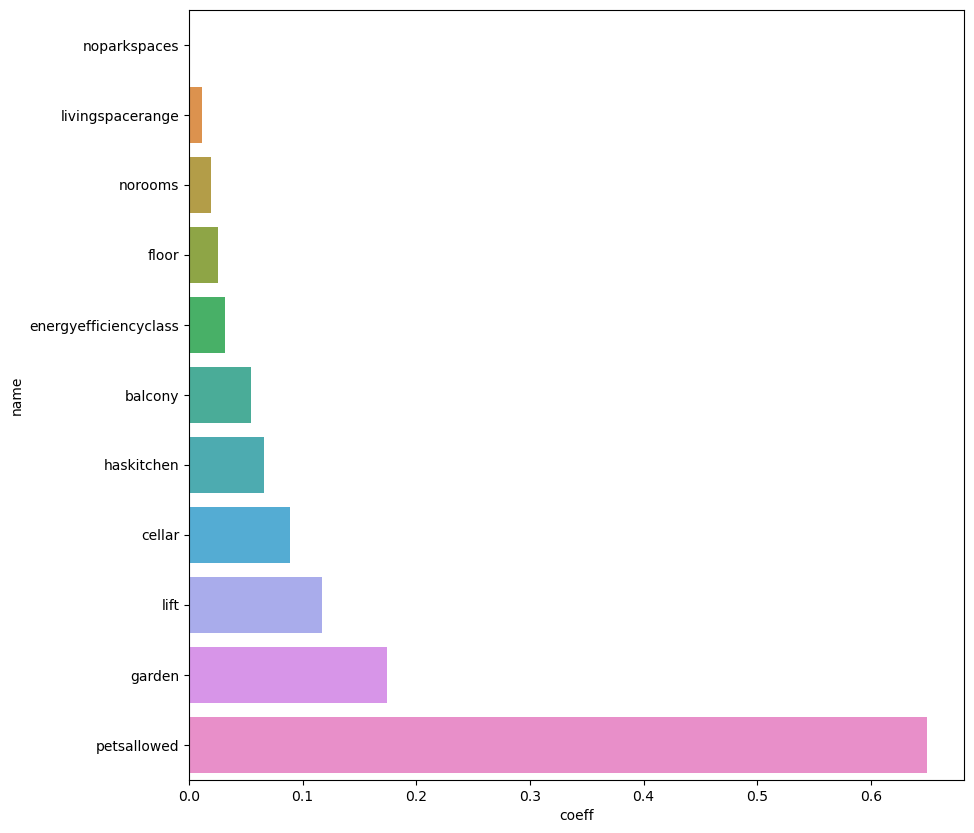

In [78]:
#visualizing
feature_names1=list(X.columns)
coefficients1 = model.coef_
coefficients1=[abs(i) for i in coefficients1[0]]
coefficients1=sorted(coefficients1)
fi_dict1 = {"name":feature_names1,"coeff":coefficients1}
fi_df1 = pd.DataFrame(fi_dict1)
fi_df1
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.barplot(y = fi_df1["name"],x =fi_df1["coeff"])

# checking model quality

In [79]:
#test model
y_pred=y_pred=pd.DataFrame(lr.predict(X_test))

In [80]:
#calculating mean errors
MSE_full=mse(y_pred,y_test)
RMSE_full=mse(y_pred,y_test, squared=False)
print(f"mse_full:{MSE_full}\nRMSE:{RMSE_full}")

mse_full:0.4149502812603461
RMSE:0.6441663459544794


In [81]:
#calculating R2 for predictions
r2_score(y_test,y_pred)

0.5891379693665941

In [82]:
#calculating r2_score for train set
y_train_pred=pd.DataFrame(lr.predict(X_train))
r2_score(y_train,y_train_pred)

0.5594951478764748